# QUORA QUESTION PAIR SIMILLARITY WITH TFIDF WORD2VECTOR

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

C:\Users\Aravindh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 4. Machine Learning Models

## 4.1 Reading data from file and storing into sql table

In [2]:
#Creating db file from csv
if not os.path.isfile('train.db'):
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','300_x','301_x','302_x','303_x','304_x','305_x','306_x','307_x','308_x','309_x','310_x','311_x','312_x','313_x','314_x','315_x','316_x','317_x','318_x','319_x','320_x','321_x','322_x','323_x','324_x','325_x','326_x','327_x','328_x','329_x','330_x','331_x','332_x','333_x','334_x','335_x','336_x','337_x','338_x','339_x','340_x','341_x','342_x','343_x','344_x','345_x','346_x','347_x','348_x','349_x','350_x','351_x','352_x','353_x','354_x','355_x','356_x','357_x','358_x','359_x','360_x','361_x','362_x','363_x','364_x','365_x','366_x','367_x','368_x','369_x','370_x','371_x','372_x','373_x','374_x','375_x','376_x','377_x','378_x','379_x','380_x','381_x','382_x','383_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y','300_y','301_y','302_y','303_y','304_y','305_y','306_y','307_y','308_y','309_y','310_y','311_y','312_y','313_y','314_y','315_y','316_y','317_y','318_y','319_y','320_y','321_y','322_y','323_y','324_y','325_y','326_y','327_y','328_y','329_y','330_y','331_y','332_y','333_y','334_y','335_y','336_y','337_y','338_y','339_y','340_y','341_y','342_y','343_y','344_y','345_y','346_y','347_y','348_y','349_y','350_y','351_y','352_y','353_y','354_y','355_y','356_y','357_y','358_y','359_y','360_y','361_y','362_y','363_y','364_y','365_y','366_y','367_y','368_y','369_y','370_y','371_y','372_y','373_y','374_y','375_y','376_y','377_y','378_y','379_y','380_y','381_y','382_y','383_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

In [3]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [4]:
read_db = 'train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
data


In [5]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 100001;", conn_r)
        conn_r.commit()
        conn_r.close()

In [6]:
# remove the first row 
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [7]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,0.499987500312492,0.499987500312492,0.857130612419823,0.857130612419823,0.727266115762584,0.533329777801481,0.0,1.0,4.0,13.0,...,15.2793600080768,5.39919739216566,2.13777290284634,-3.06889878213406,3.3754405680229,6.7361164689064,-7.80872184038162,13.0617727935314,-3.52359987795353,-1.1000040769577
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,15.5,...,-9.91418486833573,-1.30738198757172,-3.15930802375078,-7.88982777297497,-2.88015016913414,-15.6520266830921,-8.98012767732143,1.77616566419601,-11.1839511245489,-0.262479841709137
3,0.999950002499875,0.499987500312492,0.499987500312492,0.333327777870369,0.666655555740738,0.39999600004,0.0,0.0,4.0,8.0,...,5.01649652945343,3.73020273447037,-2.58491443842649,-3.04634397476912,-3.75857877545059,2.87995103187859,-7.29886836372316,2.5331454873085,1.54575282335281,1.57878881692886
4,0.749981250468738,0.749981250468738,0.666655555740738,0.499993750078124,0.699993000069999,0.583328472262731,1.0,1.0,2.0,11.0,...,-0.194829493761063,6.9257490132004,1.39664986729622,-4.04720836877823,5.88104222714901,6.5948448330164,-0.014875266700983,13.9965298771858,-4.40328110568225,3.5672604739666
5,0.454541322351615,0.333331111125926,0.374995312558593,0.199998666675556,0.380950566902062,0.210525761774311,0.0,0.0,17.0,29.5,...,26.1319680698216,35.5613279435784,13.3753447905183,-17.733818192035,36.5733992652968,3.44621949642897,-42.7041535656899,-12.3473131596111,10.4682890549302,5.42777295783162


## 4.2 Converting strings to numerics

In [9]:
data = pd.DataFrame(np.array(data.values,dtype=np.float64))

In [ ]:
'''# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)'''

In [10]:
data.to_csv('numeric_data.csv')

In [11]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = list(map(int, y_true.values))

## 4.3 Random train test split( 70:30)

In [17]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [18]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (70000, 794)
Number of data points in test data : (30000, 794)


In [19]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6322428571428571 Class 1:  0.36775714285714284
---------- Distribution of output variable in train data ----------
Class 0:  0.3677666666666667 Class 1:  0.3677666666666667


In [20]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

## 4.4 Building a random model (Finding worst-case log-loss) 

Log loss on Test Data using Random Model 0.8877671212450066


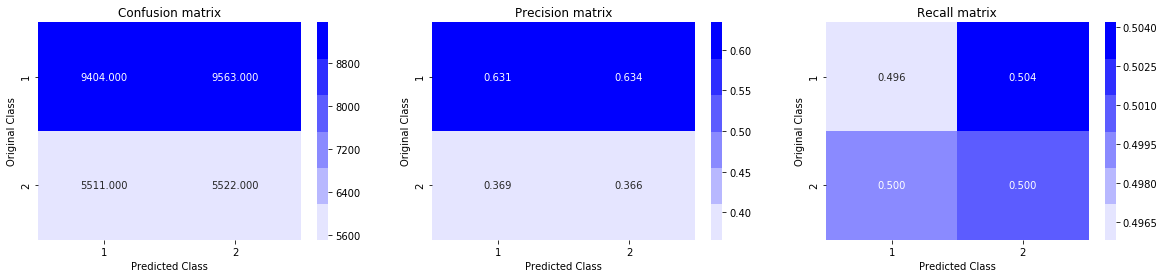

In [21]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

## 4.5 Logistic Regression with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.6018100038370673
For values of alpha =  0.0001 The log loss is: 0.530475304917484
For values of alpha =  0.001 The log loss is: 0.5198022981153775
For values of alpha =  0.01 The log loss is: 0.5253565762364582
For values of alpha =  0.1 The log loss is: 0.5268528680744162
For values of alpha =  1 The log loss is: 0.511444013388206
For values of alpha =  10 The log loss is: 0.5209142160855245


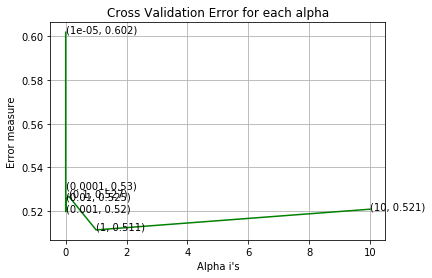

For values of best alpha =  1 The train log loss is: 0.5094050776341431
For values of best alpha =  1 The test log loss is: 0.511444013388206
Total number of data points : 30000


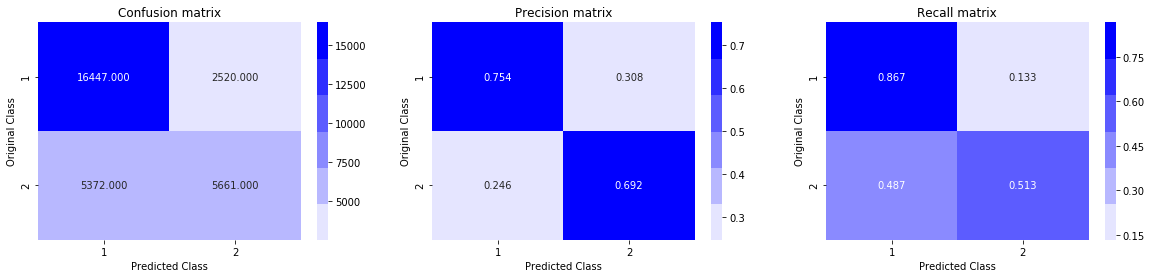

In [22]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

## 4.6 Linear SVM with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.6577563554122375
For values of alpha =  0.0001 The log loss is: 0.48095714968062203
For values of alpha =  0.001 The log loss is: 0.5153132694170238
For values of alpha =  0.01 The log loss is: 0.5605975343872299
For values of alpha =  0.1 The log loss is: 0.5963219033928199
For values of alpha =  1 The log loss is: 0.6426645798331788
For values of alpha =  10 The log loss is: 0.6577563554122375


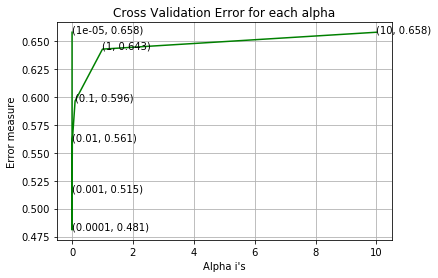

For values of best alpha =  0.0001 The train log loss is: 0.47738141270571527
For values of best alpha =  0.0001 The test log loss is: 0.48095714968062203
Total number of data points : 30000


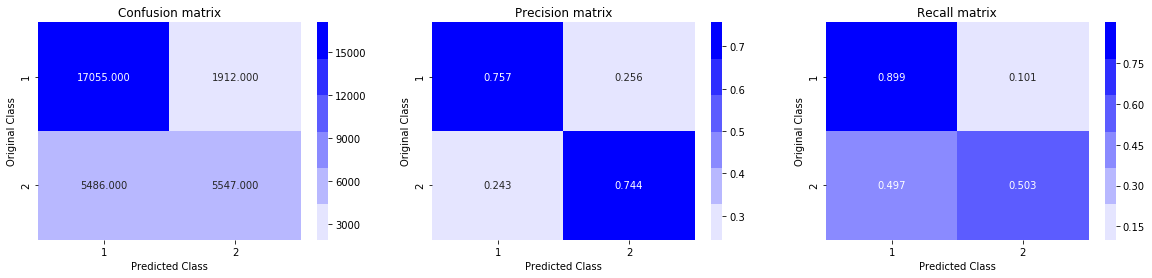

In [23]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

## 4.7 XGBoost with hyperparameter tuning

In [74]:
# use 20k datapoints for training and 5k points for testing
Xgb_X_train = X_train[:20000]
Xgb_y_train = y_train[:20000]
Xgb_X_test = X_test[:5000]
Xgb_y_test = y_test[:5000]

print(Xgb_X_train.shape)
print(Xgb_X_test.shape)

(20000, 794)
(5000, 794)


In [75]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [76]:
def XGB_best_params (X_train, y_train) :
    clf = XGBClassifier(n_jobs = -1)
    param_grid = {'learning_rate' : np.linspace(0,1,6),
                  'n_estimators' : [10, 30, 50, 100, 200, 500, 1000, 1200],
                  'max_depth' : list(range(1,7))}
    cv = 5
    rand_cv = RandomizedSearchCV(clf, param_grid, scoring='neg_log_loss', verbose=1, cv=cv, n_jobs=-1, random_state=1)
    rand_cv.fit(X_train, y_train)
    print('best Accuracy:', rand_cv.best_params_)
    print('best Score:', rand_cv.best_score_)
    #accessing cv_results
    cv_results = pd.DataFrame(rand_cv.cv_results_)
    plot_data_1 = cv_results[['param_n_estimators', 'mean_test_score']].sort_values('param_n_estimators')
    #Function for cv_error vs alpha plot
    plt.figure(figsize=(10,6))
    plt.xlabel('Hyperparams')
    plt.ylabel('Best Score')
    plt.plot(plot_data_1['param_n_estimators'], -plot_data_1['mean_test_score'], marker='o', markerfacecolor='green', markersize=10, label='n_estimators')
    plt.legend(loc='upper left')

In [77]:
def XGB(learning_rate, n_estimators, max_depth, X_train, y_train, X_test, y_test) :
    clf = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth , njobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    plot_confusion_matrix(y_test, y_pred)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 32.6min finished


best Accuracy: {'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.2}
best Score: -0.3646306380560294


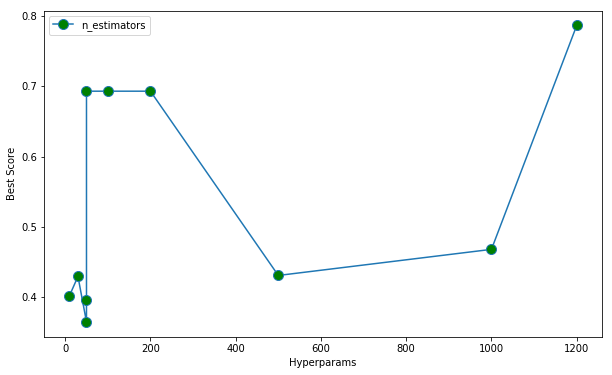

In [80]:
XGB_best_params(Xgb_X_train, Xgb_y_train)

C:\Users\Aravindh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


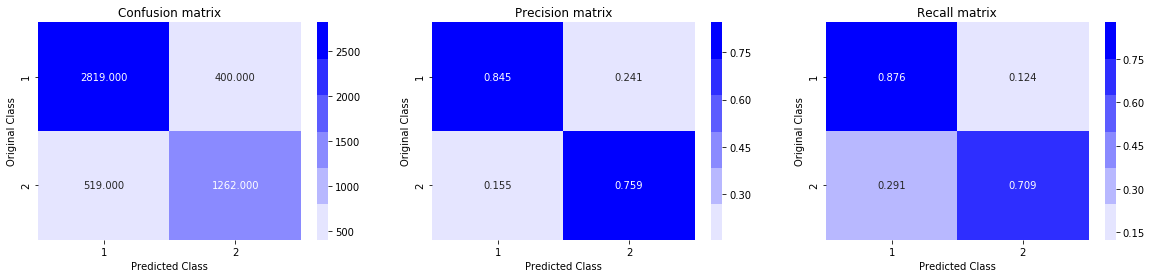

In [83]:
XGB(0.2, 50, 6, Xgb_X_train, Xgb_y_train, Xgb_X_test, Xgb_y_test)

###### Lets see if the model improves by keeping learning rate much lower

In [89]:
def XGB_best_params (X_train, y_train) :
    clf = XGBClassifier(n_jobs = -1)
    param_grid = {'learning_rate' : np.linspace(0,0.2,6),
                  'n_estimators' : [10, 30, 50, 100, 200, 500, 1000, 1200],
                  'max_depth' : list(range(1,7))}
    cv = 5
    rand_cv = RandomizedSearchCV(clf, param_grid, scoring='neg_log_loss', verbose=1, cv=cv, n_jobs=-1, random_state=1)
    rand_cv.fit(X_train, y_train)
    print('best Accuracy:', rand_cv.best_params_)
    print('best Score:', rand_cv.best_score_)
    #accessing cv_results
    cv_results = pd.DataFrame(rand_cv.cv_results_)
    plot_data_1 = cv_results[['param_n_estimators', 'mean_test_score']].sort_values('param_n_estimators')
    #Function for cv_error vs alpha plot
    plt.figure(figsize=(10,6))
    plt.xlabel('Hyperparams')
    plt.ylabel('Best Score')
    plt.plot(plot_data_1['param_n_estimators'], -plot_data_1['mean_test_score'], marker='o', markerfacecolor='green', markersize=10, label='n_estimators')
    plt.legend(loc='upper left')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 34.0min finished


best Accuracy: {'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.04}
best Score: -0.35412609879250156


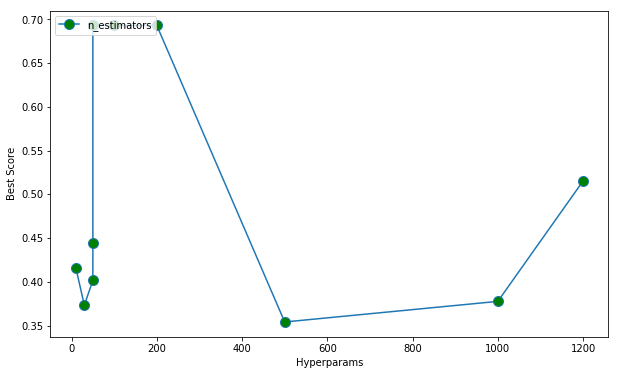

In [90]:
XGB_best_params(Xgb_X_train, Xgb_y_train)

C:\Users\Aravindh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


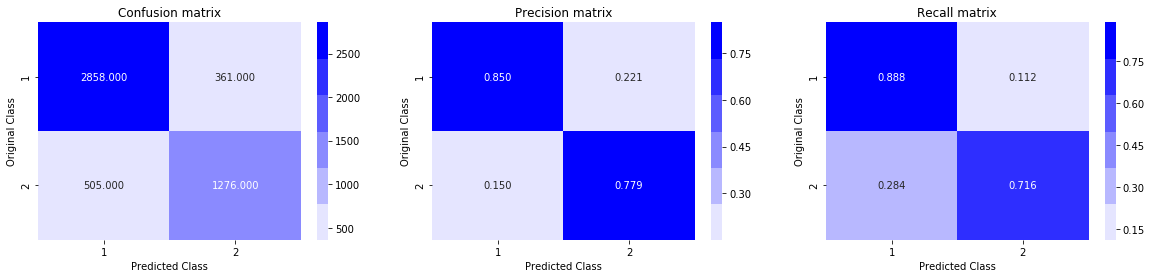

In [91]:
XGB(0.04, 500, 5, Xgb_X_train, Xgb_y_train, Xgb_X_test, Xgb_y_test)

#### Yes, the model improves a little bit but not great improvement

In [96]:
#lets viuallise the eval results & f 
clf = XGBClassifier(learning_rate=0.04, n_estimators=500, max_depth=5 , njobs=-1)
clf.fit(Xgb_X_train, Xgb_y_train,
        eval_set=[(Xgb_X_train, Xgb_y_train), (Xgb_X_test, Xgb_y_test)],
        eval_metric='logloss',
        verbose=True)
y_pred = clf.predict(Xgb_X_test)
fi = clf.feature_importances_

[0]	validation_0-logloss:0.675799	validation_1-logloss:0.675654
[1]	validation_0-logloss:0.659782	validation_1-logloss:0.65957
[2]	validation_0-logloss:0.644819	validation_1-logloss:0.644594
[3]	validation_0-logloss:0.63102	validation_1-logloss:0.630677
[4]	validation_0-logloss:0.618081	validation_1-logloss:0.617753
[5]	validation_0-logloss:0.60586	validation_1-logloss:0.605476
[6]	validation_0-logloss:0.593978	validation_1-logloss:0.593744
[7]	validation_0-logloss:0.583181	validation_1-logloss:0.582951
[8]	validation_0-logloss:0.573151	validation_1-logloss:0.57306
[9]	validation_0-logloss:0.563082	validation_1-logloss:0.563247
[10]	validation_0-logloss:0.553658	validation_1-logloss:0.553941
[11]	validation_0-logloss:0.544739	validation_1-logloss:0.545208
[12]	validation_0-logloss:0.535957	validation_1-logloss:0.53656
[13]	validation_0-logloss:0.527695	validation_1-logloss:0.528503
[14]	validation_0-logloss:0.519933	validation_1-logloss:0.520991
[15]	validation_0-logloss:0.512874	valid

[127]	validation_0-logloss:0.328276	validation_1-logloss:0.362391
[128]	validation_0-logloss:0.327873	validation_1-logloss:0.362324
[129]	validation_0-logloss:0.327107	validation_1-logloss:0.362139
[130]	validation_0-logloss:0.326671	validation_1-logloss:0.361896
[131]	validation_0-logloss:0.326234	validation_1-logloss:0.361821
[132]	validation_0-logloss:0.3253	validation_1-logloss:0.361622
[133]	validation_0-logloss:0.325	validation_1-logloss:0.361492
[134]	validation_0-logloss:0.324518	validation_1-logloss:0.361386
[135]	validation_0-logloss:0.324084	validation_1-logloss:0.361222
[136]	validation_0-logloss:0.323541	validation_1-logloss:0.360917
[137]	validation_0-logloss:0.322585	validation_1-logloss:0.360756
[138]	validation_0-logloss:0.322207	validation_1-logloss:0.360788
[139]	validation_0-logloss:0.321577	validation_1-logloss:0.360605
[140]	validation_0-logloss:0.320828	validation_1-logloss:0.360346
[141]	validation_0-logloss:0.320133	validation_1-logloss:0.360063
[142]	validatio

[252]	validation_0-logloss:0.269296	validation_1-logloss:0.352384
[253]	validation_0-logloss:0.268647	validation_1-logloss:0.352279
[254]	validation_0-logloss:0.268138	validation_1-logloss:0.352129
[255]	validation_0-logloss:0.267579	validation_1-logloss:0.352118
[256]	validation_0-logloss:0.267149	validation_1-logloss:0.352061
[257]	validation_0-logloss:0.266619	validation_1-logloss:0.351948
[258]	validation_0-logloss:0.266057	validation_1-logloss:0.351999
[259]	validation_0-logloss:0.265459	validation_1-logloss:0.351868
[260]	validation_0-logloss:0.26518	validation_1-logloss:0.351834
[261]	validation_0-logloss:0.265059	validation_1-logloss:0.351888
[262]	validation_0-logloss:0.264753	validation_1-logloss:0.351798
[263]	validation_0-logloss:0.264443	validation_1-logloss:0.351829
[264]	validation_0-logloss:0.263896	validation_1-logloss:0.351747
[265]	validation_0-logloss:0.26364	validation_1-logloss:0.351741
[266]	validation_0-logloss:0.263436	validation_1-logloss:0.351709
[267]	valida

[377]	validation_0-logloss:0.221656	validation_1-logloss:0.349903
[378]	validation_0-logloss:0.221203	validation_1-logloss:0.349797
[379]	validation_0-logloss:0.220795	validation_1-logloss:0.349756
[380]	validation_0-logloss:0.220472	validation_1-logloss:0.349656
[381]	validation_0-logloss:0.2201	validation_1-logloss:0.349539
[382]	validation_0-logloss:0.219644	validation_1-logloss:0.349501
[383]	validation_0-logloss:0.219232	validation_1-logloss:0.349468
[384]	validation_0-logloss:0.219069	validation_1-logloss:0.349399
[385]	validation_0-logloss:0.218723	validation_1-logloss:0.349359
[386]	validation_0-logloss:0.21856	validation_1-logloss:0.349341
[387]	validation_0-logloss:0.218158	validation_1-logloss:0.34936
[388]	validation_0-logloss:0.217734	validation_1-logloss:0.349312
[389]	validation_0-logloss:0.217291	validation_1-logloss:0.34925
[390]	validation_0-logloss:0.216967	validation_1-logloss:0.349251
[391]	validation_0-logloss:0.216679	validation_1-logloss:0.349296
[392]	validatio

C:\Users\Aravindh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [150]:
evals_result = clf.evals_result()
evals_result #to find the minimum of train and test log loss

{'validation_0': {'logloss': [0.675799,
   0.659782,
   0.644819,
   0.63102,
   0.618081,
   0.60586,
   0.593978,
   0.583181,
   0.573151,
   0.563082,
   0.553658,
   0.544739,
   0.535957,
   0.527695,
   0.519933,
   0.512874,
   0.505733,
   0.499111,
   0.492718,
   0.486802,
   0.481216,
   0.476064,
   0.471005,
   0.465951,
   0.461357,
   0.457184,
   0.452877,
   0.448587,
   0.44486,
   0.440993,
   0.437269,
   0.433712,
   0.430567,
   0.427338,
   0.424525,
   0.421527,
   0.418593,
   0.41583,
   0.413288,
   0.410857,
   0.408576,
   0.406378,
   0.404217,
   0.402067,
   0.40002,
   0.398158,
   0.396512,
   0.39483,
   0.393185,
   0.391695,
   0.3901,
   0.388456,
   0.386739,
   0.385248,
   0.383679,
   0.382345,
   0.380999,
   0.379849,
   0.37834,
   0.37708,
   0.375942,
   0.374597,
   0.373313,
   0.372178,
   0.371198,
   0.37024,
   0.369087,
   0.368103,
   0.367002,
   0.366151,
   0.365125,
   0.364098,
   0.363106,
   0.362127,
   0.3614,
   0.360682

# Results :

In [147]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["MODEL", "Hyperparameters", "Test-LOG-LOSS", "Train-log-loss"]

#TFIDFW2V
x.add_row(['TFIDFW2V with Random Model', 'Random values', 0.88, '-'])
x.add_row(['--'*5,'--'*5,'--'*5,'--'*5])
x.add_row(['TFIDFW2V with Logistic Regression', 'Alpha=1', 0.51, 0.50])
x.add_row(['--'*5,'--'*5,'--'*5,'--'*5])
x.add_row(['TFIDFW2V with Linear SVM', 'Alpha=0.0001', 0.48, 0.49])
x.add_row(['--'*5,'--'*5,'--'*5,'--'*5])
x.add_row(['TFIDFW2V with XGBOOST', 'n_estimators = 500\n Tree-max_depth = 5\n Learning Rate = 0.04', 0.35, 0.2])
x.add_row(['--'*5,'-'*8,'-'*8,'-'*5])
print(x)

+-----------------------------------+-----------------------+---------------+----------------+
|               MODEL               |    Hyperparameters    | Test-LOG-LOSS | Train-log-loss |
+-----------------------------------+-----------------------+---------------+----------------+
|     TFIDFW2V with Random Model    |     Random values     |      0.88     |       -        |
|             ----------            |       ----------      |   ----------  |   ----------   |
| TFIDFW2V with Logistic Regression |        Alpha=1        |      0.51     |      0.5       |
|             ----------            |       ----------      |   ----------  |   ----------   |
|      TFIDFW2V with Linear SVM     |      Alpha=0.0001     |      0.48     |      0.49      |
|             ----------            |       ----------      |   ----------  |   ----------   |
|       TFIDFW2V with XGBOOST       |   n_estimators = 500  |      0.35     |      0.2       |
|                                   |   Tree-max_d

**OBSERVATION**

Quora Question pair simillarity was trained with 100k points & 20k points with XGboost coz of computation constraints

1. Quora Question pair simmilarity is trained and tested with TFIDFW2V and the results were good.


2. we get a minimal test log loss of 0.2 with GBDT. even when trained with only 20000 points


3. there are chances that XGBoost may perform very well given that we can take whole data into account.